In [1]:
#This example illustrates how to instantiate a Latent Semantic Analysis Topic Model
#in Python and provides a few different ways to look at the results

#The preprocessing of the data (a relatively simple and small corpus of n = 250)
#is not necessarily optimized to the data

#This examples uses TF-IDF (a frequency-based method) for word embedding
#TF-IDF is also not necessarily optimal for word embedding this data

#Import all necessary modules and packages to perform LSA
#For creating dataframes and handling arrays
import pandas as pd #enables use of pandas libraries with alias pd
import numpy as np #enables use of numpy libraries with alias np
import string

#For removing stopwords
from nltk.corpus import stopwords

#For word embedding using frequency/counts method
from sklearn.feature_extraction.text import CountVectorizer

#For plotting
import matplotlib.pyplot as plt

#For word clouds
from wordcloud import WordCloud

#from word embedding using TF-IDF methods
from sklearn.feature_extraction.text import TfidfVectorizer

import string

#import LSA modelling
from sklearn.decomposition import TruncatedSVD

#For calculating Umass topic coherence
import math
from collections import defaultdict



In [2]:
#This examples uses the Peer Support Level 1 Dataset located in the Datasets Module on Canvas
# Load dataset
file_path = '/Users/airturtle/Desktop/UW/Teaching/NLP_Course/DataSets/PeerSupport/PeerSupport_Level1.xlsx'
data = pd.read_excel(file_path)
#print (data)

data_for_lsa = data[['PeerSupportResponse']].copy()
#print (data_for_nmf_df)
#data_for_nmf_df = pd.DataFrame({'Document': [data['PeerSupportResponse']]})
#data_temp = data['PeerSupportResponse']
#print (data_temp)

# Convert all elements in data_for_lda_df into strings
#data_for_lda_df = data_for_lda_df.astype(str)
print (data_for_lsa['PeerSupportResponse'])

0                                     Ask good questions
1      Reduce the amount of talking and other distrac...
2                      ask more questions during lecture
3                                Bring up more questions
4       Form study groups to understand class materials.
                             ...                        
245                   Ask all the questions all the time
246    Asking questions during lectures can help me f...
247    Ask questions during lectures if anything is n...
248    Turning on cameras helps to create the feeling...
249    Make sure to mute their mics when they are sup...
Name: PeerSupportResponse, Length: 250, dtype: object


In [7]:
#Preprocess data_for_kmeans by converting all text to lower case

# Convert all text to lower case
#data_for_lda_df.loc[:, 'LowerCase'] = data_for_lda_df.str.lower()
temp = data_for_lsa['PeerSupportResponse'].str.lower()
data_for_lsa.loc[:, 'LowerCase'] = temp

# Look at resulting text to confirm that conversion was done correctly
print (data_for_lsa)

                                   PeerSupportResponse  \
0                                   Ask good questions   
1    Reduce the amount of talking and other distrac...   
2                    ask more questions during lecture   
3                              Bring up more questions   
4     Form study groups to understand class materials.   
..                                                 ...   
245                 Ask all the questions all the time   
246  Asking questions during lectures can help me f...   
247  Ask questions during lectures if anything is n...   
248  Turning on cameras helps to create the feeling...   
249  Make sure to mute their mics when they are sup...   

                                             LowerCase  
0                                   ask good questions  
1    reduce the amount of talking and other distrac...  
2                    ask more questions during lecture  
3                              bring up more questions  
4     form study g

In [9]:
#Further preprocess data by removing stopwords from the data
stop = stopwords.words('english')

#Print data with no stopwords
temp = data_for_lsa['LowerCase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_for_lsa.loc[:, 'NoStopWords'] = temp
print (data_for_lsa)

                                   PeerSupportResponse  \
0                                   Ask good questions   
1    Reduce the amount of talking and other distrac...   
2                    ask more questions during lecture   
3                              Bring up more questions   
4     Form study groups to understand class materials.   
..                                                 ...   
245                 Ask all the questions all the time   
246  Asking questions during lectures can help me f...   
247  Ask questions during lectures if anything is n...   
248  Turning on cameras helps to create the feeling...   
249  Make sure to mute their mics when they are sup...   

                                             LowerCase  \
0                                   ask good questions   
1    reduce the amount of talking and other distrac...   
2                    ask more questions during lecture   
3                              bring up more questions   
4     form st

In [11]:
#Remove punctuation from dataset

def remove_punctuation(text):
    """Removes punctuation from a string."""
    return ''.join([char for char in text if char not in string.punctuation])

data_for_lsa['RemovePunctuation'] = data_for_lsa['NoStopWords'].apply(remove_punctuation)
print (data_for_lsa)

                                   PeerSupportResponse  \
0                                   Ask good questions   
1    Reduce the amount of talking and other distrac...   
2                    ask more questions during lecture   
3                              Bring up more questions   
4     Form study groups to understand class materials.   
..                                                 ...   
245                 Ask all the questions all the time   
246  Asking questions during lectures can help me f...   
247  Ask questions during lectures if anything is n...   
248  Turning on cameras helps to create the feeling...   
249  Make sure to mute their mics when they are sup...   

                                             LowerCase  \
0                                   ask good questions   
1    reduce the amount of talking and other distrac...   
2                    ask more questions during lecture   
3                              bring up more questions   
4     form st

In [15]:
#Create Word Embeddings using Bag of Words, TF-IDF Method

#Embed Preprocessed Documents using Bag of Words (converting to numerical data)
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2,ngram_range=(1,1),stop_words='english')
doc_term_for_lsa = tfidf_vect.fit_transform(data_for_lsa.loc[:, 'RemovePunctuation'])

feature_names = tfidf_vect.get_feature_names_out()
doc_term_for_lsa_df = pd.DataFrame(doc_term_for_lsa.toarray(), columns=feature_names)
print(doc_term_for_lsa_df)
print (type (doc_term_for_lsa_df))

     active  afraid  allow  answer  answering  answers  appropriate       ask  \
0       0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.359651   
1       0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   
2       0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.456048   
3       0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   
4       0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   
..      ...     ...    ...     ...        ...      ...          ...       ...   
245     0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.389990   
246     0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   
247     0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.395110   
248     0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   
249     0.0     0.0    0.0     0.0        0.0      0.0          0.0  0.000000   

       asking  assignments 

In [59]:
#Model Topics in dataset with Latent Semantic Analysis (LSA)
#n_components = number of topics


#Create LSA Model
n_components = 3
lsa_model = TruncatedSVD(n_components=n_components, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(doc_term_for_lsa_df)

#Look at all the words extracted from the corpus (i.e., the document dataset)
#This is a sanity check to ensure the words extracted (and those discarded make sense
feature_names = tfidf_vect.get_feature_names_out()
print (feature_names)
print ('\n')

['active' 'afraid' 'allow' 'answer' 'answering' 'answers' 'appropriate'
 'ask' 'asking' 'assignments' 'attention' 'backgrounds' 'benefit' 'best'
 'better' 'boards' 'bring' 'calls' 'camera' 'cameras' 'chat' 'cheat'
 'clarification' 'clarify' 'clarifying' 'class' 'classes' 'collaboration'
 'come' 'comments' 'confusing' 'content' 'continue' 'conversation' 'cover'
 'curve' 'discussion' 'disrupt' 'disruptive' 'distract' 'distracting'
 'distractions' 'dont' 'dumb' 'end' 'engage' 'engaged' 'engaging'
 'environment' 'especially' 'exams' 'experience' 'feel' 'form' 'friends'
 'gets' 'good' 'group' 'groups' 'hard' 'help' 'helpful' 'helps' 'homework'
 'honest' 'hours' 'instructor' 'interact' 'interactive' 'interested'
 'kind' 'know' 'laptops' 'late' 'learn' 'learning' 'lecture' 'lectures'
 'like' 'likely' 'live' 'lot' 'loudly' 'make' 'makes' 'making' 'material'
 'maybe' 'meaningful' 'mic' 'microphone' 'microphones' 'mics' 'mute'
 'muted' 'necessary' 'new' 'nice' 'normal' 'office' 'online' 'open'
 

In [61]:
#Basic LSA Results
#The lsa_matrix contains the document-topic scores
#Higher scores indicate the topic is strongly associated with the document
#Lower scores indicate the topic is more weekaly associated with the document
print("\nDocument-Topic Scores:")
print(lsa_topic_matrix)


Document-Topic Scores:
[[ 5.00632114e-01 -7.80564943e-02 -2.27297811e-02]
 [ 4.65208227e-02  2.91420208e-01  5.82142776e-03]
 [ 6.63024249e-01  3.64071508e-02  5.31457380e-01]
 [ 1.91206268e-01 -1.28959876e-03 -3.91876875e-02]
 [ 4.40171440e-02  2.61352759e-01 -1.13100371e-01]
 [ 2.90123853e-01 -5.97042943e-02 -1.84658380e-02]
 [ 5.08181974e-01 -3.26475553e-02  7.63340360e-02]
 [ 3.70978827e-01  3.38317611e-02  2.68760602e-01]
 [ 1.71337251e-01  2.30461944e-01 -1.34809935e-01]
 [ 2.40608644e-01  2.63592055e-01 -1.09669159e-01]
 [ 2.21565746e-01  2.87373323e-01 -1.92103901e-01]
 [ 3.02873235e-01  3.94370911e-02  8.50894556e-02]
 [ 2.87160666e-01  5.19135040e-02  6.30423028e-02]
 [ 2.52666801e-01 -3.98191963e-02  5.38284151e-02]
 [ 4.46663526e-01 -7.75119193e-02 -2.37748035e-02]
 [ 9.62048440e-01 -2.10701891e-01 -5.38320521e-02]
 [ 5.53357095e-01 -1.05225995e-01 -9.07759888e-04]
 [ 4.25812310e-01  1.98101036e-01 -1.12446333e-01]
 [ 5.05457512e-01 -5.08728357e-02 -2.01155960e-02]
 [ 9.62

In [75]:
#More LSA Results
#Document-Topic Distributions for Select Examples

#For the first document
print(data_for_lsa.loc[0, 'RemovePunctuation'])
print(lsa_topic_matrix[0])

#For the tenth document
print(data_for_lsa.loc[9, 'RemovePunctuation'])
print(lsa_topic_matrix[9])

#For the 250th document
print(data_for_lsa.loc[249, 'RemovePunctuation'])
print(lsa_topic_matrix[249])

#For the 125th document
print(data_for_lsa.loc[124, 'RemovePunctuation'])
print(lsa_topic_matrix[124])

#For the 64th document
print(data_for_lsa.loc[63, 'RemovePunctuation'])
print(lsa_topic_matrix[63])

ask good questions
[ 0.50063211 -0.07805649 -0.02272978]
similarly coming class prepared important extracting value classes helpful read recommended required class student better follow along ask questions engage material
[ 0.24060864  0.26359205 -0.10966916]
make sure mute mics supposed to
[0.01561648 0.16762583 0.05400545]
ask many questions professor behind certain topics due unforseen events
[ 0.3706127  -0.05207928  0.05279124]
disturb classmate
[0. 0. 0.]


In [107]:
#More LSA Model Results
#Access the topic-word distributions 
#The columns in the topic-word distribution indicate the strength with which
#Each word is relevant/assigned to a topic

# Create a DataFrame for topic-word distributions
topic_word_df = pd.DataFrame(lsa_model.components_, 
                                 index=[f"Topic {i+1}" for i in range(n_components)], 
                                 columns=feature_names)

print("Topic-Word Distributions:")
print(topic_word_df)


Topic-Word Distributions:
           active    afraid     allow    answer  answering   answers  \
Topic 1  0.000518  0.054978  0.005228  0.014392   0.011826  0.005814   
Topic 2  0.008896 -0.003337  0.029887  0.012417   0.049726 -0.000678   
Topic 3 -0.000949  0.020087  0.007210 -0.015971  -0.035797  0.001068   

         appropriate       ask    asking  assignments  ...   unclear  \
Topic 1     0.005083  0.696819  0.091522     0.000712  ...  0.012192   
Topic 2     0.010377 -0.282003  0.488232     0.013190  ...  0.010718   
Topic 3     0.013027  0.048325 -0.255033     0.005582  ... -0.002669   

         understand  understanding    unless       use     vocal     waste  \
Topic 1    0.015802       0.008486  0.006887  0.003792  0.000389  0.003343   
Topic 2    0.066146      -0.003919  0.024132  0.024466  0.006144  0.029651   
Topic 3   -0.036090       0.004172  0.024745  0.038496  0.002524  0.014465   

          willing      work      zoom  
Topic 1  0.020543  0.003180  0.000721  
Top

In [150]:
#More LSA Results
#Find top words associated with each topic in the LSA model

k = topic_word_df.shape[0]
topics = [None]*k

num_top_words = 8 # Example: show top 8 words per topic

#def display_topics(model, feature_names, num_top_words):

for topic_idx, topic in enumerate(lsa_model.components_):
            print(f"Topic {topic_idx + 1}:")
            # Sort words by their importance in the topic and get the top N
            top_words_indices = topic.argsort()[:-num_top_words - 1:-1]
            top_words = [feature_names[i] for i in top_words_indices]
            print(f"  {', '.join(top_words)}")
            topics[topic_idx] = top_words

print ()
top_words_topics = topics[0:3]#Adjust as needed for more topics in model
print (top_words_topics)

#Assign Human Labels to each Topic (these can change order when model is re-run)
#Topic 1:  Ask Questions
#Topic 2:  Be Respectful
#Topic 3:  Don't be Disruptive

Topic 1:
  ask, questions, class, lecture, asking, question, lectures, afraid
Topic 2:
  class, asking, lecture, talking, respectful, talk, students, stop
Topic 3:
  lecture, talk, talking, question, students, professor, distracting, stop

[['ask', 'questions', 'class', 'lecture', 'asking', 'question', 'lectures', 'afraid'], ['class', 'asking', 'lecture', 'talking', 'respectful', 'talk', 'students', 'stop'], ['lecture', 'talk', 'talking', 'question', 'students', 'professor', 'distracting', 'stop']]


In [134]:
#More LSA results
#Identify the dominant topic for each document:
dominant_topics = np.argmax(lsa_topic_matrix, axis=1)
print(dominant_topics)

[0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 2 2 0 1 0 0 0 0 1 2 0 2 2 0 0
 2 0 0 0 0 0 1 0 2 0 0 0 2 0 2 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 2 2 1 0 1
 0 0 1 1 1 1 0 2 1 0 2 0 0 1 0 0 0 0 0 0 0 0 2 0 0 1 0 0 2 0 0 0 0 0 0 1 1
 0 0 0 0 2 1 1 1 0 2 1 1 0 0 2 0 0 0 0 0 0 1 0 0 1 0 0 0 2 1 1 1 1 0 2 2 1
 0 0 0 0 0 0 1 0 1 2 2 1 0 1 0 1 2 1 1 1 1 1 0 1 1 2 1 0 0 1 0 1 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 2 1 2 0 2 0 2 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0
 0 1 2 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1]


In [136]:
#More LSA Results
#Look at how many responses were assigned to each topic

#Assign each response to its corresponding LDA topic (by the highest probability found for each document)
topic_assignments = lsa_model.transform(doc_term_for_lsa_df)
topic_labels = np.argmax(topic_assignments, axis=1)

#Count the occurrences of each topic label
topic_counts = np.bincount(topic_labels)

#Print the number of responses in each category
for i, count in enumerate(topic_counts):
    print(f'Topic/Category {i}: {count} responses')

Topic/Category 0: 123 responses
Topic/Category 1: 97 responses
Topic/Category 2: 30 responses


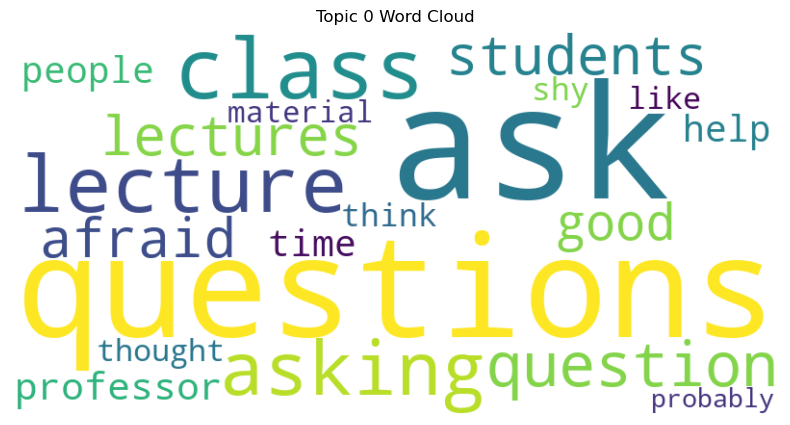

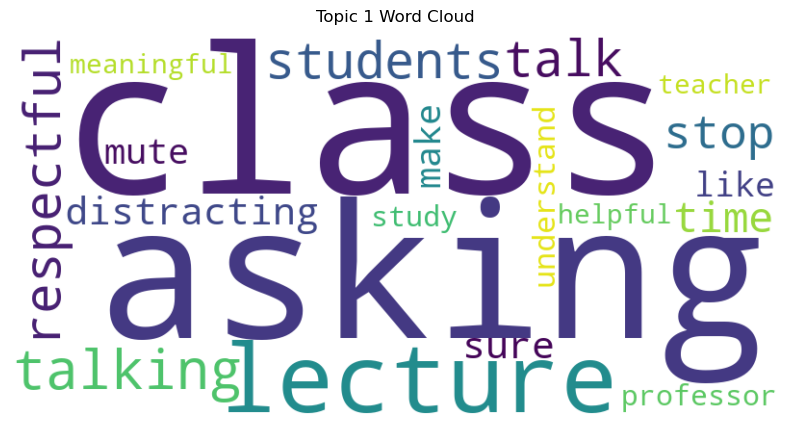

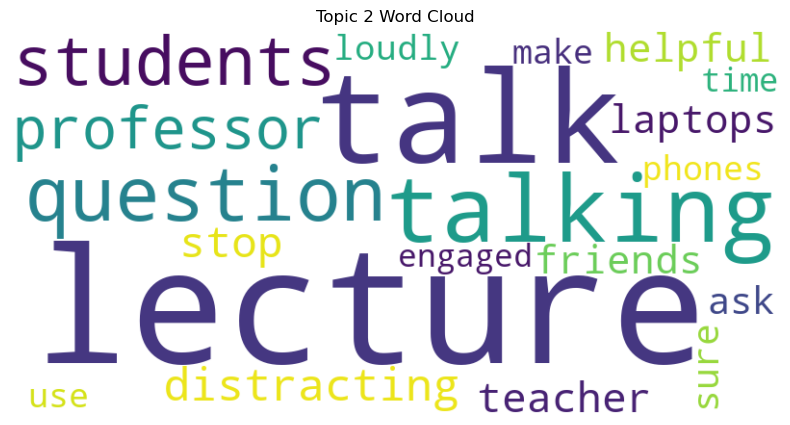

In [138]:
#More LSA Results
#Print Word Clouds for each topic
top_words_per_topic = []

for topic_idx, topic in enumerate(lsa_model.components_):
        top_words_indices = topic.argsort()[-20:][::-1] # Get indices of top 10 words
        top_words = [(feature_names[i], topic[i]) for i in top_words_indices]
        top_words_per_topic.append(top_words)

for i, topic_words in enumerate(top_words_per_topic):
        # Create a dictionary of words and their weights/frequencies
        word_freq_dict = {word: weight for word, weight in topic_words}
        if i == 0:
         wc0 = word_freq_dict
        if i==1:
         wc1 = word_freq_dict
        if i == 2:
            wc2 = word_freq_dict

# Generate the word cloud for Topic 0
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wc0)
#Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Topic 0 Word Cloud')
plt.axis('off')
plt.show()

# Generate the word cloud for Topic 1
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wc1)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Topic 1 Word Cloud')
plt.axis('off')
plt.show()

# Generate the word cloud for Topic 2
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wc2)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Topic 2 Word Cloud')
plt.axis('off')
plt.show()

In [148]:
#Calculate Topic Coherence (UMass) from the underlying formula

corpus_documents = data_for_lsa.loc[:, 'RemovePunctuation'].str.split()

def calculate_umass_coherence(topics, corpus_documents):
    """
    Calculates UMass topic coherence manually.

    Args:
        topics (list of list of str): A list where each inner list represents a topic
                                      and contains its top words.
        corpus_documents (list of list of str): A list where each inner list represents
                                                a document and contains its tokens.

    Returns:
        float: The average UMass coherence score across all topics.
    """

    # 1. Calculate D(w) and D(w_i, w_j)
    doc_freq = defaultdict(int)
    co_occurrence_freq = defaultdict(lambda: defaultdict(int))

    for doc in corpus_documents:
        unique_words_in_doc = list(set(doc)) # Consider only unique words per document for D(w) and D(w_i, w_j)
        for i, word_i in enumerate(unique_words_in_doc):
            doc_freq[word_i] += 1
            for j in range(i + 1, len(unique_words_in_doc)):
                word_j = unique_words_in_doc[j]
                co_occurrence_freq[word_i][word_j] += 1
                co_occurrence_freq[word_j][word_i] += 1 # Symmetric

    topic_coherence_scores = []
    for topic_words in topics:
        topic_pmi_sum = 0
        pair_count = 0
        
        # Calculate PMI for all unique pairs within the topic
        for i, word_i in enumerate(topic_words):
            for j in range(i + 1, len(topic_words)):
                word_j = topic_words[j]

                # Ensure words are in our corpus and have frequencies
                if word_i in doc_freq and word_j in doc_freq:
                    # Smoothing: Add 1 to co-occurrence if it's zero
                    co_occurrence = co_occurrence_freq[word_i][word_j]
                    
                    # UMass uses log((D(w_i, w_j) + 1) / (D(w_i) * D(w_j)))
                    # Note: Gensim's UMass uses log((D(w_i, w_j) + 1) / D(w_i)) in some contexts,
                    # but the general formula includes D(w_j) in the denominator.
                    # The exact formula can vary slightly across implementations.
                    
                    # For a common UMass variant, we use: log((D(w_i, w_j) + 1) / D(w_i))
                    # This is often the Gensim-like approach for UMass.
                    if doc_freq[word_i] > 0: # Avoid division by zero
                        pmi = math.log((co_occurrence + 1) / doc_freq[word_i])
                        topic_pmi_sum += pmi
                        pair_count += 1

        if pair_count > 0:
            topic_coherence_scores.append(topic_pmi_sum / pair_count)
        else:
            topic_coherence_scores.append(0) # Or handle as appropriate

    if topic_coherence_scores:
        return topic_coherence_scores, sum(topic_coherence_scores) / len(topic_coherence_scores)
        #return sum(topic_coherence_scores) / len(topic_coherence_scores)
    else:
        return 0.0

# Calculating UMass by Topic (Example, for Sanity Checking)
corpus_example = [
     ["apple", "banana", "fruit"],
     ["apple", "orange", "fruit"],
     ["car", "truck", "vehicle"],
     ["banana", "smoothie"],
 ]
topics_example = [
     ["apple", "banana", "fruit"],
     ["car", "truck"],
]
print (corpus_example)
print()
print (topics_example)
coherence = calculate_umass_coherence(topics_example, corpus_example)
print(f"UMass Coherence: {coherence}")
print ()

# Calculating UMass for LSA Model Results
#print (corpus_documents)
print (top_words_topics)
# The following returns the Umass Coherence values for each topic and the aggregate Umass topic coherence
coherence = calculate_umass_coherence(top_words_topics, corpus_documents)
print(f"UMass Coherence: {coherence}")



[['apple', 'banana', 'fruit'], ['apple', 'orange', 'fruit'], ['car', 'truck', 'vehicle'], ['banana', 'smoothie']]

[['apple', 'banana', 'fruit'], ['car', 'truck']]
UMass Coherence: ([0.1351550360360548, 0.6931471805599453], 0.41415110829800006)

[['ask', 'questions', 'class', 'lecture', 'asking', 'question', 'lectures', 'afraid'], ['class', 'asking', 'lecture', 'talking', 'respectful', 'talk', 'students', 'stop'], ['lecture', 'talk', 'talking', 'question', 'students', 'professor', 'distracting', 'stop']]
UMass Coherence: ([-2.415057570338024, -2.2043913447083368, -1.9126611263674203], -2.1773700138045937)


In [ ]:
# Load dataset
file_path = 'TASupport_Level2_All.xlsx'
data = pd.read_excel(file_path)
pd.reset_option('display.max_colwidth')


#regular
dataset = pd.DataFrame()
dataset.loc[:, 'Document'] = data['Document'].astype(str)
